In [6]:
import pandas as pd

associations_data = pd.read_csv('./data/data_a/associations.csv', header=None, delimiter=';')[:500]
associations_data.columns = ['слово-стимул','слово-реакция','количество реакций']
associations_data.head(1)

,слово-стимул,слово-реакция,количество реакций
0,мужчина,женщина,87


In [9]:
import networkx as nx
from node2vec import Node2Vec

# Создаем граф
G = nx.Graph()

# Добавляем ребра в граф из ваших данных
# Пример данных: data = ["мужчина;женщина;87", ...]
for idx, row in associations_data.iterrows():
    G.add_edge(row['слово-стимул'], row['слово-реакция'], weight=float(row['количество реакций']))

# Инициализация Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Обучение модели Node2Vec
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Получаем векторное представление для вершины
vector = model.wv['мужчина']


Generating walks (CPU: 1): 100%|██████████| 50/50 [00:05<00:00,  9.92it/s]


## Понижение размерности и вывод результата

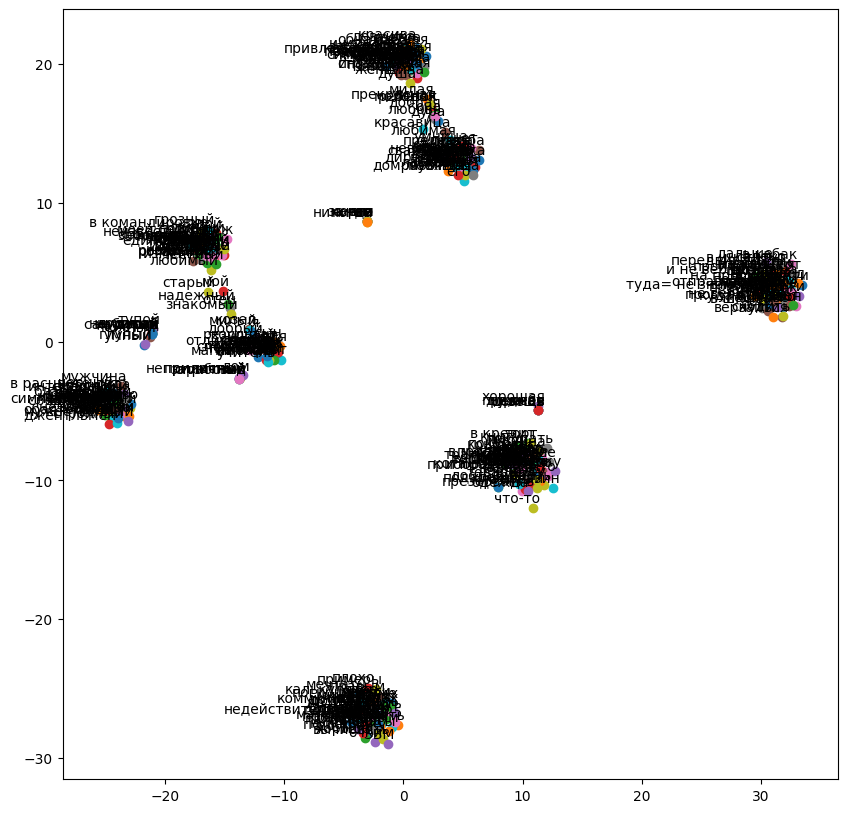

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Предполагаем, что model - это ваша обученная модель Node2Vec

# Get the list of words (vocabulary)
words = model.wv.index_to_key

# Get vectors for each word
vectors = np.array([model.wv[word] for word in words])

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
vectors_2d = tsne.fit_transform(vectors)

# Visualization
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()
